In [301]:
#Using pandas for loading the csv file into a dataframe
import pandas as pd

#Using matplotlib library for basic graph plotting
import matplotlib.pyplot as plt

#Using seaborn library that allows us to optimize matplotlib's output
import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

In [302]:
credit = pd.read_csv('clean_dataset.csv')
credit.head(5)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


<AxesSubplot:xlabel='Approved', ylabel='count'>

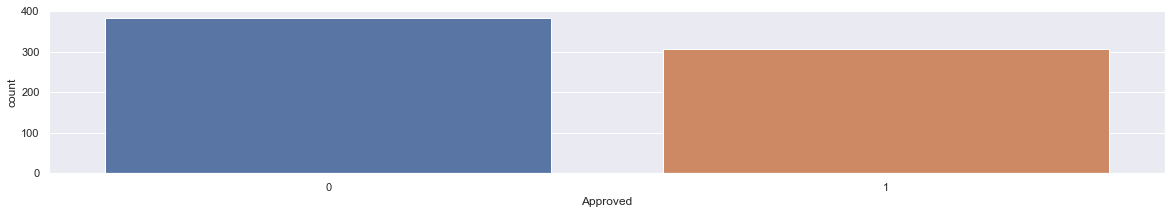

In [303]:
#Generating 5 data visualizations
sns.countplot(x='Approved', data = credit)

<AxesSubplot:xlabel='Approved', ylabel='count'>

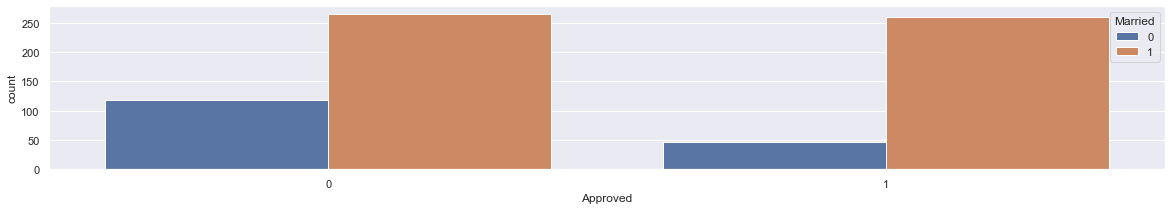

In [304]:
sns.countplot(x='Approved', data = credit, hue = 'Married')

<AxesSubplot:>

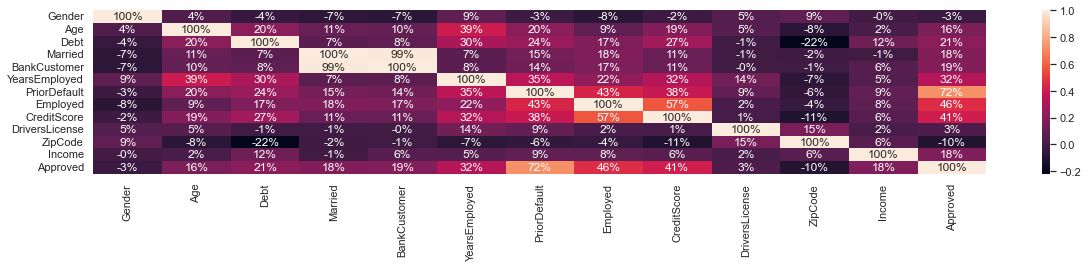

In [305]:
sns.heatmap(credit.corr(), annot=True, fmt ='.0%')

<AxesSubplot:xlabel='Ethnicity', ylabel='Income'>

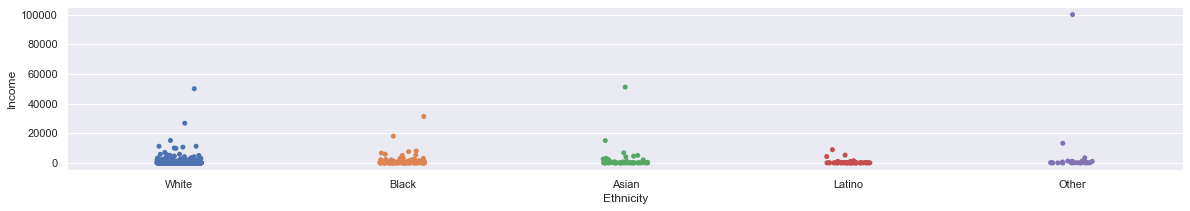

In [306]:
sns.stripplot(x="Ethnicity", y="Income", data=credit)

<AxesSubplot:xlabel='Ethnicity'>

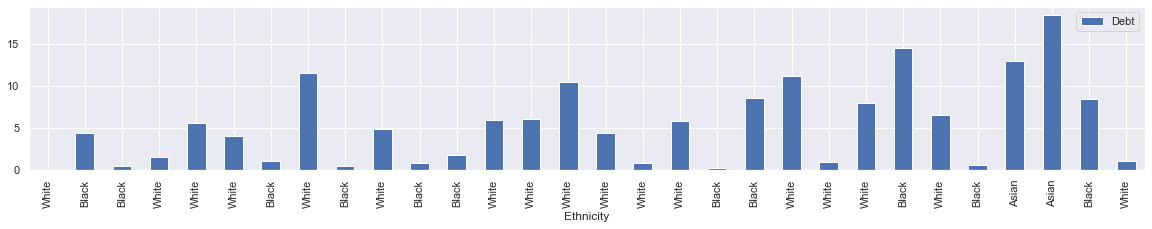

In [307]:
credit.head(30).plot(kind='bar', x = 'Ethnicity', y = 'Debt')

In [308]:
#Finding how many Nans in the dataset
credit.isna().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [309]:
#Splitting the dataset into features and targets
y = credit[['Approved']].values
X = credit[['Gender', 'Married', 'Debt', 'Employed', 'Income']].values

In [310]:
#Splitting the dataset into training and test sets in the ratio 70/30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [311]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm

In [349]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [350]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [351]:
#Creating a Linear Regression Model
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#Training the Linear Regression model using the training data
lr.fit(X_train, y_train)

C:\Users\yaelr\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

In [407]:
#Performing 5-Fold Cross Validation for lr
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(lr, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7370919243986255


In [408]:
#Performing Naive-Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [409]:
#Performing 5-Fold Cross Validation for gnb
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(gnb, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7018041237113402


In [402]:
#Perform a decision trees
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [410]:
#Performing 5-Fold Cross Validation for dt
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(dt, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7079037800687284


In [320]:
#Perform a random forests
rf = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rf.fit(X_train,y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=1)

In [364]:
#Performing 5-Fold Cross Validation for rf
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(rf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7286726804123711


In [322]:
#Perform a K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [323]:
#Performing 5-Fold Cross Validation for knn
k = 5
kf = KFold(n_splits=k)

#for other scoring parameters see here https://scikit-learn.org/stable/modules/model_evaluation.html
result = cross_val_score(knn, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
 
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7059707903780069


In [324]:
#Perform a SVM
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train.ravel())

In [325]:
#Performing 5-fold Cross Validation on a Linear SVM
result = cross_val_score(linear, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7454037800687285


In [326]:
result = cross_val_score(rbf, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7557345360824742


In [327]:
result = cross_val_score(poly, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.7494845360824742


In [328]:
result = cross_val_score(sig, X_train, y_train.ravel(), cv = kf, scoring='accuracy')
print(f' Avg accuracy:{result.mean()}')

 Avg accuracy:0.6645833333333333


In [329]:
#Making predictions on the Test dataset-Logistic Regression
y_pred = lr.predict(X_test)

In [330]:
#Generate Classification Report- Logistic Regression
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       113
           1       0.70      0.71      0.71        94

    accuracy                           0.73       207
   macro avg       0.73      0.73      0.73       207
weighted avg       0.73      0.73      0.73       207



In [331]:
#Making predictions on the Test dataset-Naive-Bayes
y_pred_gnb = gnb.predict(X_test)

In [332]:
#Generate Classification Report- Naive-Bayes
print(classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.67      0.94      0.78       113
           1       0.85      0.44      0.58        94

    accuracy                           0.71       207
   macro avg       0.76      0.69      0.68       207
weighted avg       0.75      0.71      0.69       207



In [333]:
#Making predictions on the Test dataset- Decision Trees
y_pred_dt = dt.predict(X_test)

In [334]:
#Generate Classification Report- Decision Trees
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.72      0.75      0.74       113
           1       0.69      0.65      0.67        94

    accuracy                           0.71       207
   macro avg       0.70      0.70      0.70       207
weighted avg       0.70      0.71      0.70       207



In [335]:
#Making predictions on the Test dataset- Random Forests
y_pred_rf = rf.predict(X_test)

In [336]:
#Generate Classification Report- Random Forests
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       113
           1       0.69      0.68      0.68        94

    accuracy                           0.71       207
   macro avg       0.71      0.71      0.71       207
weighted avg       0.71      0.71      0.71       207



In [337]:
#Making predictions on the Test dataset- KNN
y_pred_knn = knn.predict(X_test)

In [338]:
#Generate Classification Report- KNN
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       113
           1       0.69      0.63      0.66        94

    accuracy                           0.71       207
   macro avg       0.70      0.70      0.70       207
weighted avg       0.70      0.71      0.70       207



In [339]:
#Linear SVM Classification Report
svm_linear_pred = linear.predict(X_test)
print(classification_report(y_test, svm_linear_pred))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73       113
           1       0.68      0.66      0.67        94

    accuracy                           0.71       207
   macro avg       0.70      0.70      0.70       207
weighted avg       0.70      0.71      0.70       207



In [340]:
#Poly SVM Classification Report
svm_poly_pred = poly.predict(X_test)
print(classification_report(y_test, svm_poly_pred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       113
           1       0.71      0.70      0.71        94

    accuracy                           0.73       207
   macro avg       0.73      0.73      0.73       207
weighted avg       0.73      0.73      0.73       207



In [341]:
#Sig SVM Classification Report
svm_sig_pred = sig.predict(X_test)
print(classification_report(y_test, svm_sig_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72       113
           1       0.66      0.62      0.64        94

    accuracy                           0.68       207
   macro avg       0.68      0.68      0.68       207
weighted avg       0.68      0.68      0.68       207



In [342]:
##RBF SVM Classification Report
svm_rbf_pred = rbf.predict(X_test)
print(classification_report(y_test, svm_rbf_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75       113
           1       0.70      0.67      0.68        94

    accuracy                           0.72       207
   macro avg       0.72      0.72      0.72       207
weighted avg       0.72      0.72      0.72       207



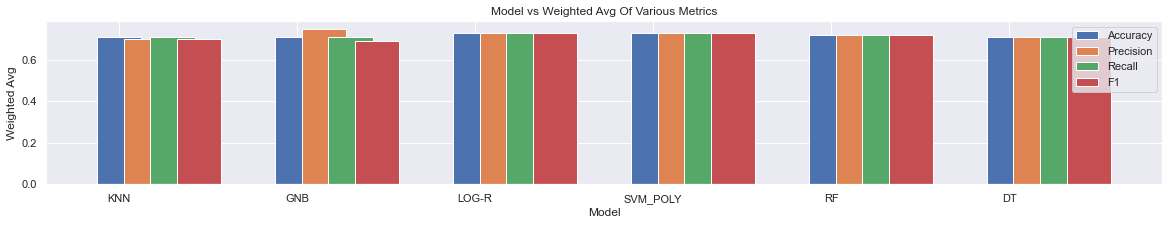

In [343]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X   = ['KNN','GNB','LOG-R','SVM_POLY', 'RF', 'DT']

#Collect this information from the classification reports and store them in lists
accuracy  = [0.71, 0.71, 0.73, 0.73, 0.72, 0.71]
precision = [0.70, 0.75, 0.73, 0.73, 0.72, 0.71]
recall    = [0.71, 0.71, 0.73, 0.73, 0.72, 0.71]
f1        = [0.70, 0.69, 0.73, 0.73, 0.72, 0.71]

#here we use np.arange to get the number of items to place on the x-axis 
X_axis = np.arange(len(X))

#the spacing between each bar each bar
spacing= 0.15

#setting the size of the graph
plt.rcParams["figure.figsize"] = (20,3)
  
#below we are plotting 4 bars for each label on the x-axis with the following syntax
#plt.bar(star_pos_for_each_bar, list_of_values, width_of each_bar, label_name_for each bar)
plt.bar(X_axis, accuracy, 0.25, label = 'Accuracy')
plt.bar(X_axis + spacing, precision, 0.25, label = 'Precision')
plt.bar(X_axis + spacing *2, recall, 0.25, label = 'Recall')
plt.bar(X_axis + spacing *3, f1, 0.25, label = 'F1')

#setting the range of values for the X axis
plt.xticks(X_axis, X)
plt.xlabel("Model")
plt.ylabel("Weighted Avg")
plt.title("Model vs Weighted Avg Of Various Metrics")
plt.legend(loc='upper right')

plt.show()